Estado: Optimal
x1 = 15.0
x2 = 5.0
Z = 95.0


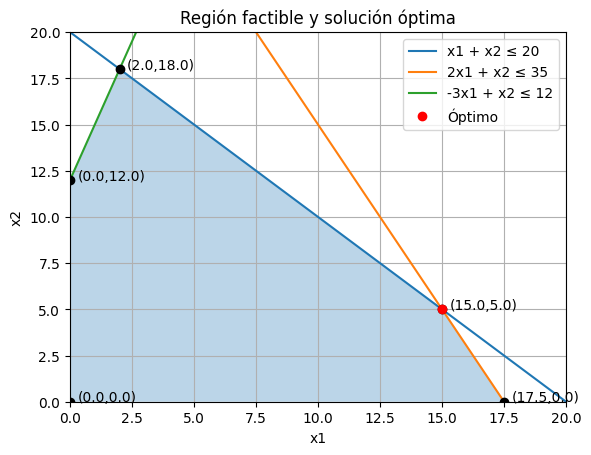

In [1]:
import pulp
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# ============================
# Definición del problema
# ============================
modelo = pulp.LpProblem("Ejercicio_1.0", pulp.LpMaximize)

x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)

modelo += 5*x1 + 4*x2, "Z"

modelo += x1 + x2 <= 20
modelo += 2*x1 + x2 <= 35
modelo += -3*x1 + x2 <= 12

modelo.solve()

print("Estado:", pulp.LpStatus[modelo.status])
print("x1 =", pulp.value(x1))
print("x2 =", pulp.value(x2))
print("Z =", pulp.value(modelo.objective))

# ============================
# Graficar restricciones
# ============================
x = np.linspace(0, 20, 200)
y1 = 20 - x
y2 = 35 - 2*x
y3 = 3*x + 12

plt.plot(x, y1, label="x1 + x2 ≤ 20")
plt.plot(x, y2, label="2x1 + x2 ≤ 35")
plt.plot(x, y3, label="-3x1 + x2 ≤ 12")

plt.fill_between(x, 0, np.minimum(np.minimum(y1,y2), y3),
                 where=(np.minimum(np.minimum(y1,y2), y3) >= 0), alpha=0.3)

# ============================
# Cálculo de vértices factibles
# ============================
A = [
    [1,1],   # x1+x2=20
    [2,1],   # 2x1+x2=35
    [-3,1],  # -3x1+x2=12
]

b = [20, 35, 12]

vertices = []

# Intersección entre pares de rectas
for (i,j) in combinations(range(3),2):
    A_ij = [A[i],A[j]]
    b_ij = [b[i],b[j]]
    try:
        sol = np.linalg.solve(A_ij, b_ij)
        if all(sol >= 0):  # condiciones de no negatividad
            if (sol[0]+sol[1] <= 20 and
                2*sol[0]+sol[1] <= 35 and
                -3*sol[0]+sol[1] <= 12):
                vertices.append(tuple(sol))
    except np.linalg.LinAlgError:
        pass

# Intersecciones con ejes
vertices.extend([(0,0),(0,12),(17.5,0)])

# Quitar duplicados
vertices = list(set(vertices))

# Graficar vértices
for vx, vy in vertices:
    plt.plot(vx, vy, "ko")
    plt.text(vx+0.3, vy, f"({vx:.1f},{vy:.1f})")

# Punto óptimo
plt.plot(pulp.value(x1), pulp.value(x2), "ro", label="Óptimo")

plt.xlim((0,20))
plt.ylim((0,20))
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.title("Región factible y solución óptima")
plt.show()



Estado: Optimal
x1 = 0.0
x2 = 5.0
x3 = 0.0
Z = 20.0


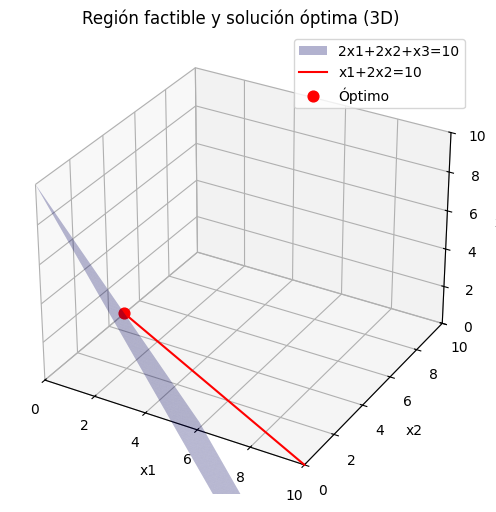

In [2]:
import pulp
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# ======================
# 1) Modelo con PuLP
# ======================
modelo = pulp.LpProblem("Ejercicio_2.0", pulp.LpMaximize)

# Variables
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)
x3 = pulp.LpVariable("x3", lowBound=0)

# Función objetivo
modelo += 3*x1 + 4*x2 + 1.5*x3, "Z"

# Restricciones
modelo += x1 + 2*x2 <= 10
modelo += 2*x1 + 2*x2 + x3 <= 10

# Resolver
modelo.solve()

# Resultados
print("Estado:", pulp.LpStatus[modelo.status])
print("x1 =", pulp.value(x1))
print("x2 =", pulp.value(x2))
print("x3 =", pulp.value(x3))
print("Z =", pulp.value(modelo.objective))

# ======================
# 2) Gráfica 3D de la región factible
# ======================
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

# Crear malla de puntos
x1_vals = np.linspace(0,10,50)
x2_vals = np.linspace(0,10,50)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Restricciones en función de x1 y x2
Y1 = 10 - X1 - 2*X2   # de la 1ra restricción (x1 + 2x2 <= 10) -> solo para plano ilustrativo
Z1 = 10 - 2*X1 - 2*X2 # de la 2da restricción (2x1+2x2+x3 <=10)

# Graficar superficie del límite de la segunda restricción
ax.plot_surface(X1, X2, Z1, alpha=0.3, color="blue", label="2x1+2x2+x3=10")

# Graficar plano x1+2x2=10 como línea sobre plano base (para referencia en XY)
x2_line = np.linspace(0,5,50)
x1_line = 10 - 2*x2_line
ax.plot(x1_line, x2_line, zs=0, zdir="z", color="red", label="x1+2x2=10")

# Punto óptimo
ax.scatter(pulp.value(x1), pulp.value(x2), pulp.value(x3), 
           color="red", s=60, label="Óptimo")

# Configuración de ejes
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
ax.set_title("Región factible y solución óptima (3D)")

plt.legend()
plt.show()
